In [1]:
'''
Build an ANN model for Drug classification.
This project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features.
Dataset Link: https://www.kaggle.com/datasets/prathamtripath/drug-classification
Task 1: Read the dataset and do data pre-processing
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)
Task 3: Test the model with random data
'''

'\nBuild an ANN model for Drug classification.\nThis project aims to analyze the relationship between various medical parameters and drug effectiveness. The dataset consists of patient information, including age, sex, blood pressure levels (BP), cholesterol levels, sodium-to-potassium ratio (Na_to_K), drug type, and corresponding labels. The goal is to develop a model that can accurately predict the class or category of a given drug based on its features.\nDataset Link: https://www.kaggle.com/datasets/prathamtripath/drug-classification\nTask 1: Read the dataset and do data pre-processing\nTask 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)\nTask 3: Test the model with random data\n'

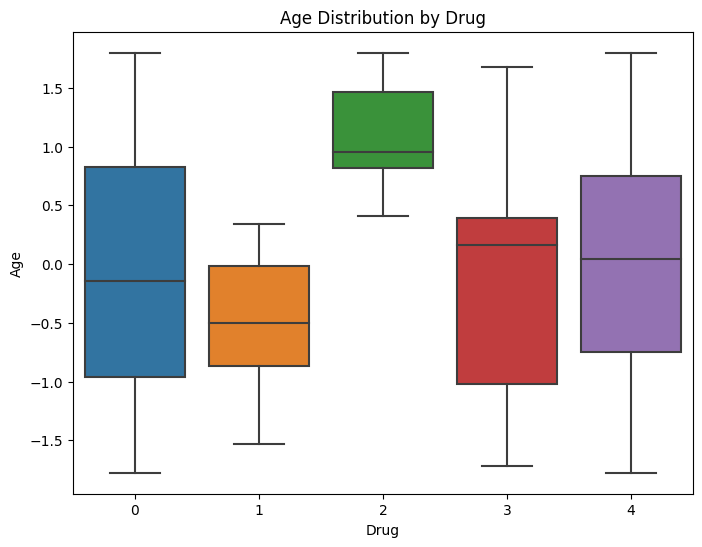

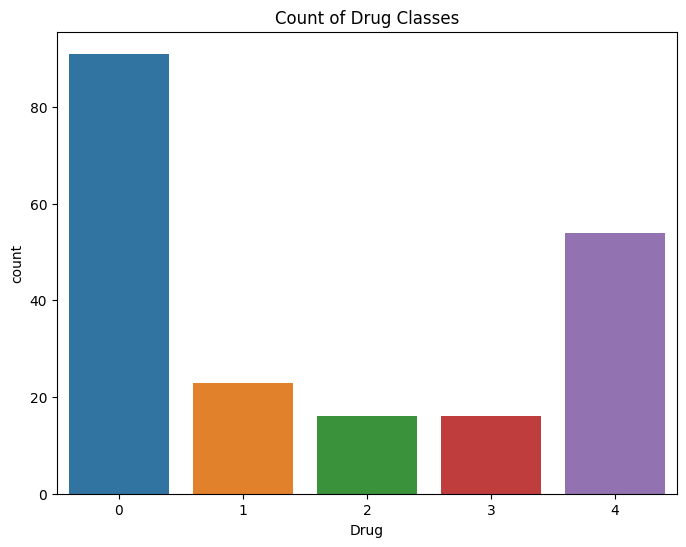

In [3]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1: Data Pre-processing
# Load the dataset using pandas
df = pd.read_csv('drug200.csv')
df = df.dropna()
le = LabelEncoder()
df['Drug'] = le.fit_transform(df['Drug'])
df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol'])

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['Age', 'Na_to_K']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Task 2: Data Visualization
sampled_df = df_encoded.sample(n=100)

# Boxplot of Age by Drug
plt.figure(figsize=(8, 6))
sns.boxplot(x='Drug', y='Age', data=df_encoded)
plt.title('Age Distribution by Drug')
plt.show()

# Countplot of Drug classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Drug', data=df_encoded)
plt.title('Count of Drug Classes')
plt.show()

# Task 3: Build the ANN Model
X = df_encoded.drop('Drug', axis=1)
y = df_encoded['Drug']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y_train to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a sequential model
model = tf.keras.Sequential()


model.add(tf.keras.layers.Dense(32, activation='relu', input_dim=X.shape[1]))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model


